# ROMY Events - Data

In [1]:
import os
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/bay200/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'
elif os.uname().nodename == 'lin-ffb-01':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'

### Configurations

In [3]:
config = {}

# path to data
config['path_to_data'] = data_path+"romy_events/data/"

config['path_to_figs'] = data_path+"romy_events/figures/"

# specify event file
config['eventfile'] = "ROMYevents_2020_2023_status.csv"

# specify catalog
config['catalogfile'] = "catalogs/ROMY_global_catalog_20200101_20231231.pkl"

# ROMY coordinates
config['sta_lon'] = 11.275501
config['sta_lat'] = 48.162941


### Load Catalog

In [4]:
cat = pd.read_pickle(config['path_to_data']+config['catalogfile'])

# add row with UTC times
cat['time_utc'] = [str(obs.UTCDateTime(str(_e).split('.')[0], precision=0)) for _e in cat.timestamp]

cat['depth_km'] = cat.depth / 1000

In [5]:
cat

,timestamp,latitude,longitude,depth,magnitude,type,seconds,backazimuth,distances_km,time_utc,depth_km
0,2020-01-06 10:32:19.160,17.7486,-66.8286,8079.8,5.95,mb,0.000000e+00,273.611213,7683.547502,2020-01-06T10:32:19Z,8.0798
1,2020-01-07 06:05:19.680,2.3273,96.4130,20388.2,6.02,mb,7.038052e+04,91.926528,9456.374129,2020-01-07T06:05:19Z,20.3882
2,2020-01-07 08:24:25.120,17.8096,-66.7908,7922.0,6.27,mb,7.872596e+04,273.629169,7675.920763,2020-01-07T08:24:25Z,7.9220
3,2020-01-09 08:38:08.890,62.2654,171.0078,8959.8,5.97,mb,2.523497e+05,9.987013,7629.287864,2020-01-09T08:38:08Z,8.9598
4,2020-01-19 13:27:57.850,39.7669,77.1324,10361.2,5.78,mb,1.133739e+06,74.622163,5202.291787,2020-01-19T13:27:57Z,10.3612
...,...,...,...,...,...,...,...,...,...,...,...
1100,2023-12-20 12:11:22.030,-16.0280,-72.5450,94900.0,6.00,M,1.247675e+08,254.883009,10872.229523,2023-12-20T12:11:22Z,94.9000
1101,2023-12-23 17:48:05.220,52.0190,159.0030,36100.0,5.98,M,1.250469e+08,19.778726,8487.701245,2023-12-23T17:48:05Z,36.1000
1102,2023-12-28 09:15:18.470,44.5560,148.9440,45900.0,6.50,M,1.254482e+08,29.127618,8935.182118,2023-12-28T09:15:18Z,45.9000
1103,2023-12-28 09:37:27.210,44.4540,149.1610,38000.0,6.36,M,1.254495e+08,29.034678,8953.123325,2023-12-28T09:37:27Z,38.0000


### Load Event Data

In [6]:
# load data base
events = pd.read_csv(config['path_to_data']+config['eventfile'], header=0, skiprows=4)

# prepare dataframe
events.dropna(subset="Event", inplace=True)
events.sort_values(by="# Event")
events.reset_index(drop=True, inplace=True)

# add row with UTC times
events['time_utc'] = [str(obs.UTCDateTime(f"{_e.split('_')[1]}T{_e.split('_')[2]}", precision=0)) for _e in events.Event]

events

,# Event,Event,FUR,RLAS,ROMY-Z,ROMY-U,ROMY-V,ROMY-W,FURQ,RLASQ,ZQ,UQ,VQ,WQ,Comment,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,time_utc
0,0.0,000_20200107_060519_filtered.png,True,True,False,False,False,False,False,False,False,False,False,False,NaN,0.0,20200107.0,60519.0,filtered.png,2020-01-07T06:05:19Z
1,1.0,001_20200107_082425_filtered.png,True,True,False,False,False,False,False,False,False,False,False,False,NaN,1.0,20200107.0,82425.0,filtered.png,2020-01-07T08:24:25Z
2,2.0,002_20200119_165820_filtered.png,True,True,False,False,False,False,False,False,False,False,False,False,NaN,2.0,20200119.0,165820.0,filtered.png,2020-01-19T16:58:20Z
3,3.0,003_20200120_065138_filtered.png,True,False,False,False,False,False,False,False,False,False,False,False,NaN,3.0,20200120.0,65138.0,filtered.png,2020-01-20T06:51:38Z
4,4.0,004_20200124_175515_filtered.png,True,True,True,True,False,False,False,False,False,True,False,False,Z coda incomplete,4.0,20200124.0,175515.0,filtered.png,2020-01-24T17:55:15Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,423.0,423_20231211_063331_filtered.png,False,False,False,False,False,False,False,False,False,False,False,False,NaN,423.0,20231211.0,63331.0,filtered.png,2023-12-11T06:33:31Z
424,424.0,424_20231211_063331_filtered.png,False,False,False,False,False,False,False,False,False,False,False,False,NaN,424.0,20231211.0,63331.0,filtered.png,2023-12-11T06:33:31Z
425,425.0,425_20231228_091518_filtered.png,True,True,True,True,True,False,False,False,True,True,True,False,"Z interrupted at start, U interrupted, V inte...",425.0,20231228.0,91518.0,filtered.png,2023-12-28T09:15:18Z
426,426.0,426_20231228_093727_filtered.png,True,True,True,True,True,False,False,False,True,True,True,False,"Z interrupted at start, U interrupted, V inte...",426.0,20231228.0,93727.0,filtered.png,2023-12-28T09:37:27Z


### Merge Dataframes

In [7]:
df = pd.merge(left=cat, right=events, on="time_utc")

In [8]:
df

,timestamp,latitude,longitude,depth,magnitude,type,seconds,backazimuth,distances_km,time_utc,...,RLASQ,ZQ,UQ,VQ,WQ,Comment,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,2020-01-07 06:05:19.680,2.3273,96.4130,20388.2,6.02,mb,7.038052e+04,91.926528,9456.374129,2020-01-07T06:05:19Z,...,False,False,False,False,False,NaN,0.0,20200107.0,60519.0,filtered.png
1,2020-01-07 08:24:25.120,17.8096,-66.7908,7922.0,6.27,mb,7.872596e+04,273.629169,7675.920763,2020-01-07T08:24:25Z,...,False,False,False,False,False,NaN,1.0,20200107.0,82425.0,filtered.png
2,2020-01-19 16:58:20.270,-0.0922,123.7908,134364.4,6.04,mb,1.146361e+06,72.743117,11667.078041,2020-01-19T16:58:20Z,...,False,False,False,False,False,NaN,2.0,20200119.0,165820.0,filtered.png
3,2020-01-20 06:51:38.360,-59.3480,-26.3762,103227.9,6.28,mb,1.196359e+06,199.669607,12400.384022,2020-01-20T06:51:38Z,...,False,False,False,False,False,NaN,3.0,20200120.0,65138.0,filtered.png
4,2020-01-24 17:55:15.540,38.2987,39.1475,12303.2,6.15,mb,1.581776e+06,105.672138,2496.661360,2020-01-24T17:55:15Z,...,False,False,True,False,False,Z coda incomplete,4.0,20200124.0,175515.0,filtered.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,2023-12-11 06:33:31.900,-18.9340,-175.5060,245000.0,6.20,M,1.239697e+08,12.888509,16704.989259,2023-12-11T06:33:31Z,...,False,False,False,False,False,NaN,423.0,20231211.0,63331.0,filtered.png
436,2023-12-11 06:33:31.900,-18.9340,-175.5060,245000.0,6.20,M,1.239697e+08,12.888509,16704.989259,2023-12-11T06:33:31Z,...,False,False,False,False,False,NaN,424.0,20231211.0,63331.0,filtered.png
437,2023-12-28 09:15:18.470,44.5560,148.9440,45900.0,6.50,M,1.254482e+08,29.127618,8935.182118,2023-12-28T09:15:18Z,...,False,True,True,True,False,"Z interrupted at start, U interrupted, V inte...",425.0,20231228.0,91518.0,filtered.png
438,2023-12-28 09:37:27.210,44.4540,149.1610,38000.0,6.36,M,1.254495e+08,29.034678,8953.123325,2023-12-28T09:37:27Z,...,False,True,True,True,False,"Z interrupted at start, U interrupted, V inte...",426.0,20231228.0,93727.0,filtered.png


In [9]:
df.keys()

Index(['timestamp', 'latitude', 'longitude', 'depth', 'magnitude', 'type',
       'seconds', 'backazimuth', 'distances_km', 'time_utc', 'depth_km',
       '# Event', 'Event', 'FUR', 'RLAS', 'ROMY-Z', 'ROMY-U', 'ROMY-V',
       'ROMY-W', 'FURQ', 'RLASQ', 'ZQ', 'UQ', 'VQ', 'WQ', 'Comment',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

### Select events with RLAS and ROMY-Z

In [10]:
select_z_idx = list(np.where((df.RLAS == True) & (df['ROMY-Z'] == True) & (df.ZQ == False))[0])

select_z = df[df.index.isin(select_z_idx)]

In [13]:
select_z

Index(['timestamp', 'latitude', 'longitude', 'depth', 'magnitude', 'type',
       'seconds', 'backazimuth', 'distances_km', 'time_utc', 'depth_km',
       '# Event', 'Event', 'FUR', 'RLAS', 'ROMY-Z', 'ROMY-U', 'ROMY-V',
       'ROMY-W', 'FURQ', 'RLASQ', 'ZQ', 'UQ', 'VQ', 'WQ', 'Comment',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

### Pick maximal Amplitudes in Fband

In [30]:
config['path_to_mseed'] = data_path+"romy_events/data/waveforms/ACC/"

In [48]:
for _i, ev in select_z.iterrows():
    if _i > 10:
        continue
    print(ev.Event.replace("_filtered.png", ".mseed"))
    # specify waveform file name
    wavformfile = ev.Event.replace("_filtered.png", ".mseed")

    # load waveform data
    st0 = obs.read(config['path_to_mseed']+wavformfile)

    st0 = st0.detrend("demean")


004_20200124_175515.mseed


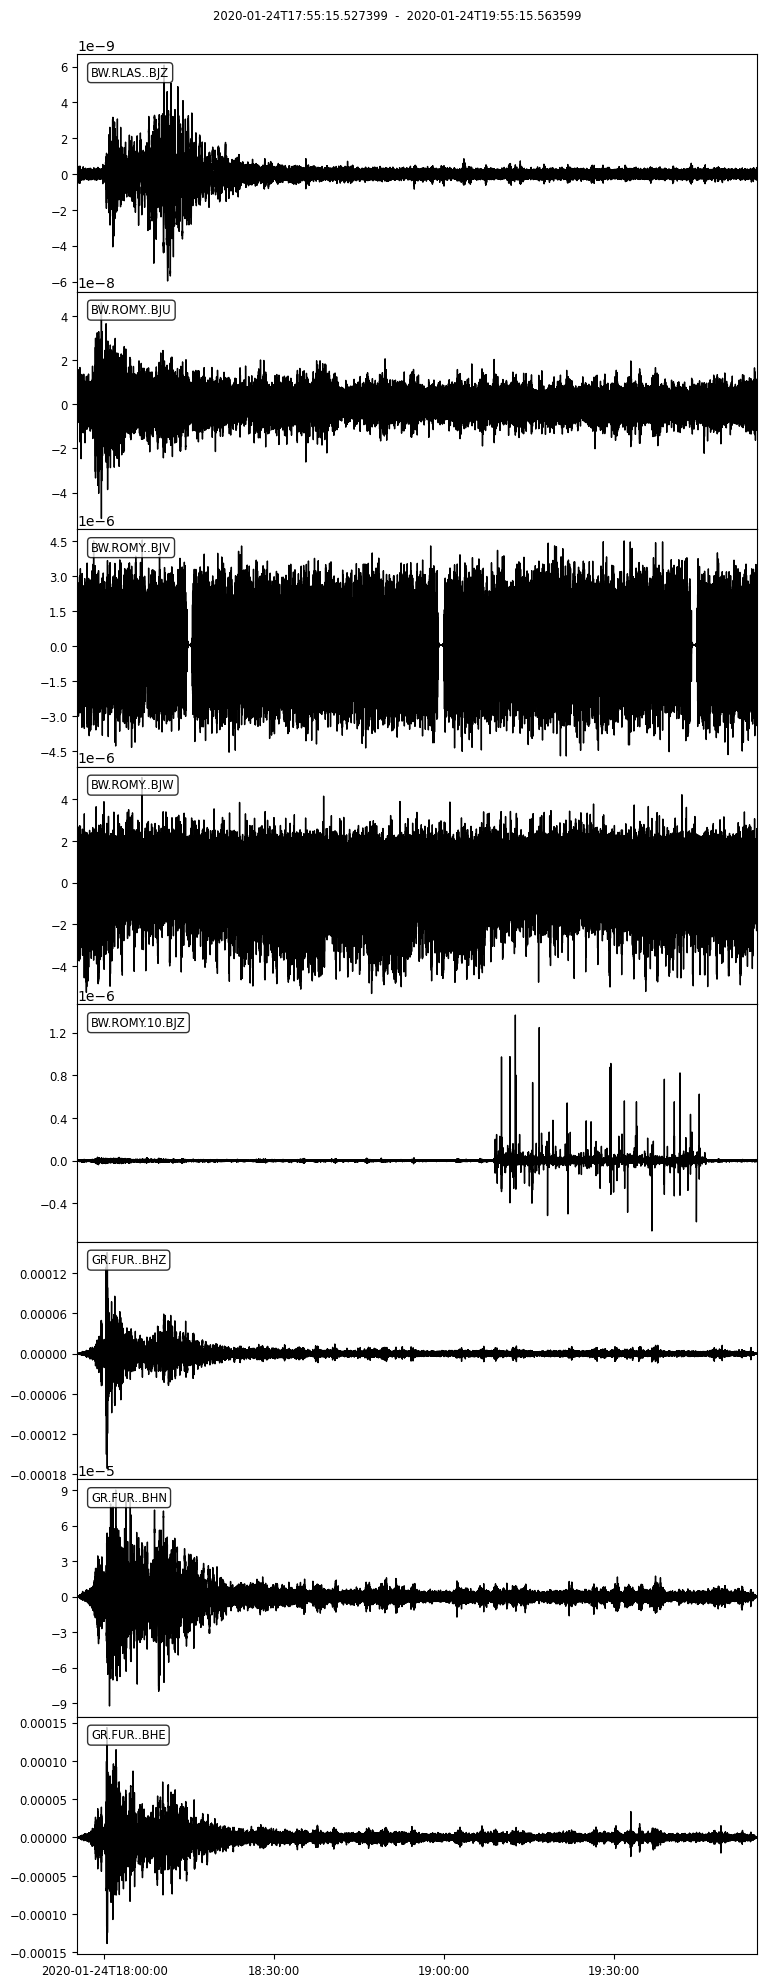

In [49]:
st0.plot(equal_scale=False);

In [50]:
from obspy.signal.trigger import classic_sta_lta
from obspy.signal.trigger import plot_trigger

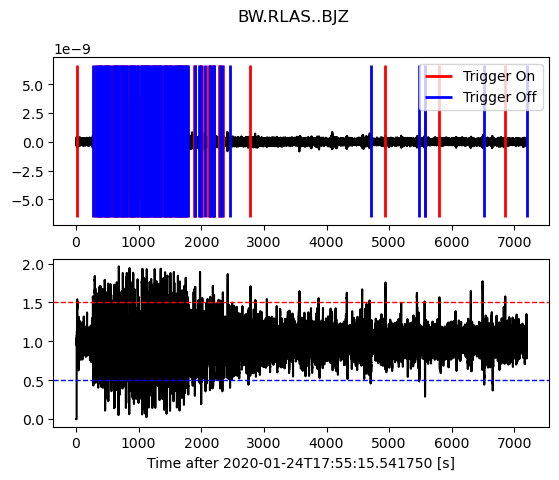

In [51]:
trace = st0.select(station="RLAS", channel="*Z")[0]
df = trace.stats.sampling_rate


cft = classic_sta_lta(trace.data, int(5 * df), int(10 * df))

plot_trigger(trace, cft, 1.5, 0.5)